# Sales 

## Import packages

In [3]:
# importing packages
import pandas as pd
import numpy as np
import utils
print("All packages imported successfully!")

All packages imported successfully!


## Import and inspect data

In [61]:
# Dataframe from csv file
df = pd.read_csv("AusApparalSales4thQrt2020.csv", parse_dates=['Date'], index_col=['Date'])

# pd.options.display.float_format = '{:,.2f}'.format
# df.style.format("{.2f")

print(f"df.head()\n {df.head()} \n")
print(f"df.tail() \n {df.tail()}\n")
print("df.describe()")
df.describe()

df.head()
                   Time State     Group  Unit  Sales
Date                                               
2020-10-01     Morning    WA      Kids     8  20000
2020-10-01     Morning    WA       Men     8  20000
2020-10-01     Morning    WA     Women     4  10000
2020-10-01     Morning    WA   Seniors    15  37500
2020-10-01   Afternoon    WA      Kids     3   7500 

df.tail() 
                   Time State     Group  Unit  Sales
Date                                               
2020-12-30   Afternoon   TAS   Seniors    14  35000
2020-12-30     Evening   TAS      Kids    15  37500
2020-12-30     Evening   TAS       Men    15  37500
2020-12-30     Evening   TAS     Women    11  27500
2020-12-30     Evening   TAS   Seniors    13  32500

df.describe()


,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [72]:
# # Reset index to get dimensions -- we want to list Date as a column
def current_indexes():
    return df.index.names

def clear_indexes(index_name):
    if index_name in current_indexes():
        df.reset_index(inplace=True)
    return current_indexes()
    
clear_indexes('Date')

[None]

In [73]:
dimensions = df.shape
print(
    f"Dimensions {dimensions} Data contains {dimensions[0]} rows and {dimensions[1]} columns"
)
print(f"Columns are {list(df.columns)}")

Dimensions (7560, 6) Data contains 7560 rows and 6 columns
Columns are ['Date', 'Time', 'State', 'Group', 'Unit', 'Sales']


In [74]:
df.select_dtypes(np.object_).columns

Index(['Time', 'State', 'Group'], dtype='object')

In [75]:
# Check memory
print("Before optimizing")
print(f"size: {df.size}\n")
print(f"memory_usage: \n{df.memory_usage(deep=True)} \n")
print(f"{df.dtypes}")

Before optimizing
size: 45360

memory_usage: 
Index       128
Date      60480
Time     496440
State    457920
Group    474390
Unit      60480
Sales     60480
dtype: int64 

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object


In [76]:
# Optimize memory
# Convert object type to str, Date to datetime and reduce int.
cols = df.select_dtypes(np.object_).columns[1:]  # every object type except Date
df[cols] = df[cols].astype("string")
df["Date"] = pd.to_datetime(df["Date"])
df["Unit"] = df["Unit"].astype("int8")
df["Sales"] = df["Sales"].astype("int32")

In [77]:
print("After optimizing")
print(f"size: {df.size}\n")
print(f"memory_usage: \n{df.memory_usage(deep=True)}\n")
print(f"{df.dtypes}")

After optimizing
size: 45360

memory_usage: 
Index       128
Date      60480
Time     496440
State    457920
Group    474390
Unit       7560
Sales     30240
dtype: int64

Date     datetime64[ns]
Time             object
State    string[python]
Group    string[python]
Unit               int8
Sales             int32
dtype: object


#### Observations

We can see that memory usage reduced at least in `Date`, `Unit`, and `Sales`. It wasn't the case for Time, State, and Group. 

In [78]:
# Changing Time, State, Group back to object
df[cols] = df[cols].astype(object)
print("After changing back")
print(f"memory_usage: \n{df.memory_usage(deep=True)}\n")
print(f"{df.dtypes}")

After changing back
memory_usage: 
Index       128
Date      60480
Time     496440
State    457920
Group    474390
Unit       7560
Sales     30240
dtype: int64

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit               int8
Sales             int32
dtype: object


### Data wrangling

a. Ensure that the data is clean and free from any missing or incorrect entries.

In [79]:
df.info(verbose=True)
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int8          
 5   Sales   7560 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int8(1), object(3)
memory usage: 273.3+ KB


In [80]:
# Find rows with at least one NA value
print(f"Find rows with at least one NA value: {df[df.isna().any(axis=1)]} \n")

# Find rows where all values are empty
# df[df.isna().all(axis=1)]

# Find columns with at least one empty value
print(f"Find columns with at least one empty value: {df.columns[df.isna().any()]}\n")

# Find columns where all values are empty
# df.columns[df.isna().all()]

# Checking for null in any of the columns
print(f"Checking for null in any of the columns: \n{df.isna().sum()}")
df.notna().sum()

Find rows with at least one NA value: Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: [] 

Find columns with at least one empty value: Index([], dtype='object')

Checking for null in any of the columns: 
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

#### Observations

In the result, we can see that the data does not have null values:

- `df.info()` is telling us that 7560 records are non-null, and with `df.shape` we confirmed that there are 7560 rows.
- `df.isna().sum()`returns 0 for each column
- `df.notnat().sum()` returns 7560 for each columns, which tells me that there are not NaN

However, `isna()` or `df.notna()` doesn't seen to check for missing values (spaces, empty string)

For practice purposes, I added NaN and empty string to the dataframe to ensure I checked for empty string and NaN values. 

In [215]:
from datetime import datetime
import locale

# Note:
# I was getting "time data '29-Dec-2020' does not match format '%d-%b-%Y'""
# The %b directive in the strptime method is locale-dependent so I set it to EN-US

# Set the locale to English
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

# 20-Dec-2020,'Afternoon', '', Seniors, 13, 32500
# 30-Dec-2020','Evening', 'TAS',None,12, 33500
# 31-Dec-2020',np.nan, 'TAS','Kids',12, 3350

# Add 3 rows with empty values, None and NaN to the dataframe
df2 = df.copy()
df2.head()
df2.loc[len(df2.index)] = [
    datetime.strptime("29-Dec-2020", "%d-%b-%Y"),
    "Afternoon",
    "",
    "Seniors",
    12,
    30500,
]  # empty value in State
df2.loc[len(df2.index)] = [
    datetime.strptime("30-Dec-2020", "%d-%b-%Y"),
    " Evening",
    "TAS",
    None,
    12,
    43500,
]  # None value in Group
df2.loc[len(df2.index)] = [
    datetime.strptime("31-Dec-2020", "%d-%b-%Y"),
    np.nan,
    " TAS",
    "Kids ",
    12,
    33500,
]  # Nan value in Time, Add left Space on State
df2.loc[len(df2.index)] = [
    datetime.strptime("31-Dec-2020", "%d-%b-%Y"),
    None,
    "WA   ",
    np.nan,
    4,
    53500,
]  # None in Time, Nan value in Group, Add right space on State
df2.loc[len(df2.index)] = [
    datetime.strptime("31-Dec-2020", "%d-%b-%Y"),
    "Morning",
    "WA   ",
    np.nan,
    4,
    53500,
]  # None in Time, Nan value in Group, Add right space on State
df2.tail()

,Date,Time,State,Group,Unit,Sales
7560,2020-12-29,Afternoon,,Seniors,12,30500
7561,2020-12-30,Evening,TAS,None,12,43500
7562,2020-12-31,NaN,TAS,Kids,12,33500
7563,2020-12-31,None,WA,NaN,4,53500
7564,2020-12-31,Morning,WA,NaN,4,53500


In [216]:
print(f"Before optimization copy of dataset (df2)")
print(f"df2.dtypes: \n{df2.dtypes}\n")
print(f"memory_usage: \n{df2.memory_usage(deep=True)}\n")

# Optimize df2 too 
df2["Unit"] = df2["Unit"].astype("int8")
df2["Sales"] = df2["Sales"].astype("int32")

print(f"After optimization")
print(f"df2.dtypes: \n{df2.dtypes}\n")
print(f"memory_usage: \n{df2.memory_usage(deep=True)}\n")

df2.select_dtypes(np.object_).columns

Before optimization copy of dataset (df2)
df2.dtypes: 
Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

memory_usage: 
Index     60520
Date      60520
Time     489131
State    450662
Group    467044
Unit      60520
Sales     60520
dtype: int64

After optimization
df2.dtypes: 
Date     datetime64[ns]
Time             object
State            object
Group            object
Unit               int8
Sales             int32
dtype: object

memory_usage: 
Index     60520
Date      60520
Time     489131
State    450662
Group    467044
Unit       7565
Sales     30260
dtype: int64



Index(['Time', 'State', 'Group'], dtype='object')

In [217]:
# Checking for null with numpy
print(
    f"Using numPy isnull(), it only detects None and NaN \nSo running 'np.where(pd.isnull(df2)' returns: {np.where(pd.isnull(df2))}"
)
print(
    "Indicating that in row 7561 column Group there is a None value, in row 7562 column Time there is a NaN value  \n" 
    "and in row 7563 Time col is None, Group col is NaN \n"
)

print(
    f"Same as isna(), it only detects None and NaN\n So running, 'df2[df2.isna().any(axis=1)])': \n{df2[df2.isna().any(axis=1)]} \n"
)

print(
    f"In conclusion, we need to check for '' (empty) values as well df2[df2.apply(lambda x: x == '').any(axis=1)]\n"
)
print(f"{df2[df2.apply(lambda x: x == '').any(axis=1)]} \n")
# print(f"{df2[df2.any(axis=1) == '']} \n")
print(f"And we combine checking for NaN and '' empty values to ")

# Using isna()
# df2[df2.isna().any(axis=1) | df2.map(lambda x: x == '').any(axis=1)]

# Using isnull
df2[df2.isnull().any(axis=1) | (df2 == "").any(axis=1)]

Using numPy isnull(), it only detects None and NaN 
So running 'np.where(pd.isnull(df2)' returns: (array([7561, 7562, 7563, 7563, 7564]), array([3, 1, 1, 3, 3]))
Indicating that in row 7561 column Group there is a None value, in row 7562 column Time there is a NaN value  
and in row 7563 Time col is None, Group col is NaN 

Same as isna(), it only detects None and NaN
 So running, 'df2[df2.isna().any(axis=1)])': 
           Date      Time  State  Group  Unit  Sales
7561 2020-12-30   Evening    TAS   None    12  43500
7562 2020-12-31       NaN    TAS  Kids     12  33500
7563 2020-12-31      None  WA       NaN     4  53500
7564 2020-12-31   Morning  WA       NaN     4  53500 

In conclusion, we need to check for '' (empty) values as well df2[df2.apply(lambda x: x == '').any(axis=1)]

           Date       Time State    Group  Unit  Sales
7560 2020-12-29  Afternoon        Seniors    12  30500 

And we combine checking for NaN and '' empty values to 


,Date,Time,State,Group,Unit,Sales
7560,2020-12-29,Afternoon,,Seniors,12,30500
7561,2020-12-30,Evening,TAS,None,12,43500
7562,2020-12-31,NaN,TAS,Kids,12,33500
7563,2020-12-31,None,WA,NaN,4,53500
7564,2020-12-31,Morning,WA,NaN,4,53500


In [209]:
# To check for the columns
# cols_with_empty = df2.apply(lambda col: col.apply(lambda x: x.strip() == '' if isinstance(x, str) else False).any())
# print(cols_with_empty[cols_with_empty].index.tolist())
print("Columns with empty string or NaN values")
df2.columns[df2.isnull().any() | (df2 == "").any()]

Columns with empty string or NaN values


Index(['Time', 'State', 'Group'], dtype='object')

#### Observations

Using numpy we can see:

- `np.where(pd.isnull(df))` returns the row and column indices where the value is NaN. We get empty arrays as a result
- `np.where(df.map(lambda x: x == ''))` also returns empty arrays. 

Note that using `map` requires calling a Python function once for each cell of the DataFrame. That could be slow for a large DataFrame, so it would be better 
to arrange for all the blank cells to contain NaN instead, and then use `pd.isnull()`


b. Based on your knowledge of Data Analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

#### Recomendations

There are a couple things we could do. 
- Per above comment, for all the blank cells I will fill with NaN 

In [210]:
# Replace with NaN and then find those rows.
df = df.replace("", np.nan)
nan_values = df[df.isna().any(axis=1)]
nan_values

nan_rows = df.loc[df.isna().any(axis=1)]
nan_rows

,Date,Time,State,Group,Unit,Sales


In [211]:
# I will use df2 to make my recommendation in the case of missing/incorrect data

# 1. First replace '' with NaN

# df2.replace('None', np.nan, inplace=True) and find them
# df2 = df2.replace(" ", np.nan)

# Find Options
# a. Using `df.loc``
# nan_rows  = df2.loc[df2.isna().any(axis=1)]

# b. finding all `isnull()` rows first
# null_mask = df2.isnull().any(axis=1)
# null_rows = df2[null_mask]
# null_rows

# c. or directly finding all `isna()`` rows
nan_rows = df2[df2.isna().any(axis=1)]
nan_rows

,Date,Time,State,Group,Unit,Sales
7561,2020-12-30,Evening,TAS,None,12,43500
7562,2020-12-31,NaN,TAS,Kids,12,33500
7563,2020-12-31,None,WA,NaN,4,53500


In [212]:
# 2. Then, make sure that each value is unique, so we can groupby later.
categorical_cols = ["Time", "State", "Group"]
categorical_df = df2[categorical_cols]

# a. describe() will give you the unique info
categorical_df.describe()

,Time,State,Group
count,7562,7564,7562
unique,4,10,5
top,Afternoon,TAS,Seniors
freq,2521,1081,1891


In [219]:
# b. Or inspecting with `nunique()` and `unique()`
if df2.Time.nunique() != len(df2.Time.unique()):
    print(f"Time values {df2.Time.unique()} - {df2.Time.nunique(dropna=True)}")

if df2.State.nunique() != len(df2.State.unique()):
    print(f"State values {df2.State.unique()} - {df2.State.nunique(dropna=True)}")

if df2.Group.nunique() != len(df2.Group.unique()):
    print(f"Group values {df2.Group.unique()} - {df2.Group.nunique(dropna=True)}")


df2.Time.nunique()
len(df2.Time.unique())

print(f"State values {df2.State.unique()} - {df2.State.nunique()}")

Time values ['Morning' 'Afternoon' 'Evening' ' Evening' nan None] - 4
Group values ['Kids' 'Men' 'Women' 'Seniors' None 'Kids ' nan] - 5
State values ['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS' '' ' TAS' 'WA   '] - 10


#### Observations
We can see that some categorical values has spaces:
- For Time, ' Evening' and 'Evening'  
- For State, 'TAS   ' isn't the same as 'TAS'. Same for 'WA'vs 'WA   '
- For Group, ' Kids'and 'Kids'. ' Seniors' vs 'Seniors'
- Notice that `nunique()` drops NaN and None, but not "" 

Therefore they are not unique values.


In [220]:
# c. with value_counts() we can also see that something isn't quite right. (What are the possible values that belogn to this category)
for colName in list(categorical_df):
    print(f"{colName} counts: \n {df2[colName].value_counts()} \n")

Time counts: 
 Time
Morning      2521
Afternoon    2521
Evening      2520
 Evening        1
Name: count, dtype: int64 

State counts: 
 State
TAS      1081
WA       1080
NT       1080
SA       1080
VIC      1080
QLD      1080
NSW      1080
WA          2
            1
 TAS        1
Name: count, dtype: int64 

Group counts: 
 Group
Seniors    1891
Kids       1890
Men        1890
Women      1890
Kids          1
Name: count, dtype: int64 



In [222]:
# Checking the rows added manually with NAN 
times = df2.loc[7560: 7565]['Time']
states = df2.loc[7560: 7565]['State']
group = df2.loc[7560: 7565]['Group']

print(times)
print(states)
print(group)

7560    Afternoon
7561      Evening
7562          NaN
7563         None
7564      Morning
Name: Time, dtype: object
7560         
7561      TAS
7562      TAS
7563    WA   
7564    WA   
Name: State, dtype: object
7560    Seniors
7561       None
7562      Kids 
7563        NaN
7564        NaN
Name: Group, dtype: object


In [223]:
# 3. Remove spaces to then groupby unique values
# ====================
# Not sure why this isn't working
# for colName in list(df2_categorical):
#     df[colName] = df[colName].apply(lambda x: x.strip())
#     print(f"{colName} values: {df2[colName].unique()} - {df2[colName].nunique()}")
print("\nDescribe df2 before removing spaces")
df2[categorical_cols].describe() 


Describe df2 before removing spaces


,Time,State,Group
count,7563,7565,7562
unique,4,10,5
top,Morning,TAS,Seniors
freq,2521,1081,1891


In [224]:
# Removing spaces by using strip()

df2["Time"] = df2["Time"].str.strip()
df2["State"] = df2["State"].str.strip()
df2["Group"] = df2["Group"].str.strip()

print(f"Time values {df2.Time.unique()} - {df2.Time.nunique()}")
print(f"State values {df2.State.unique()} - {df2.State.nunique()}")
print(f"Group values {df2.Group.unique()} - {df2.Group.nunique()}")
print("\nDescribe df2 after removing spaces")
df2[categorical_cols].describe() 

Time values ['Morning' 'Afternoon' 'Evening' nan None] - 3
State values ['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS' ''] - 8
Group values ['Kids' 'Men' 'Women' 'Seniors' None nan] - 4

Describe df2 after removing spaces


,Time,State,Group
count,7563,7565,7562
unique,3,8,4
top,Morning,WA,Kids
freq,2521,1082,1891


In [225]:
# Apply the same to the original df
df["Time"] = df["Time"].str.strip()
df["State"] = df["State"].str.strip()
df["Group"] = df["Group"].str.strip()
print("\nDescribe df after removing spaces")
df[categorical_cols].describe() 


Describe df after removing spaces


,Time,State,Group
count,7560,7560,7560
unique,3,7,4
top,Morning,WA,Kids
freq,2520,1080,1890


In [226]:
# 4. In this case I decided to dropna() but you could also fillin with mode() sample because we only have 3 rows (added) with NaN

# time_value =list(df2['Time'].mode().sample())[0]
# df2.fillna({'Time': time_value }, inplace=True)

# group_value =list(df2['Group'].mode().sample())[0]
# df2.fillna({'Group': group_value }, inplace=True)

# state_value =list(df2['State'].mode().sample())[0]
# df2.fillna({'State': group_value }, inplace=True)
# df2 = df2.dropna()
df2 = df2.dropna()
df = df.dropna()
# print(len(df2) == len(df))

c. Choose a suitable Data Wrangling technique——either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)


##### Data binning: Standardization

The data is very consistent, so Standardization isn't neccessary. I will be doing it just for practicing. 

Moving on I will be focused with Normalization technique by using `groupby`

In [227]:
# Data binning: Standardization
from scipy.stats import zscore

df['zcore-sales'] = zscore(df['Sales'])

threshold = 2
df['outliers'] = np.where((df['zcore-sales'] - threshold > 0), True, np.where(df['zcore-sales'] + threshold < 0, True, False))

df.head()
# df.tail()

,Date,Time,State,Group,Unit,Sales,zcore-sales,outliers
0,2020-10-01,Morning,WA,Kids,8,20000,-0.775581,False
1,2020-10-01,Morning,WA,Men,8,20000,-0.775581,False
2,2020-10-01,Morning,WA,Women,4,10000,-1.085645,False
3,2020-10-01,Morning,WA,Seniors,15,37500,-0.232969,False
4,2020-10-01,Afternoon,WA,Kids,3,7500,-1.163162,False


In [228]:
# Even though it doesn't make sense to find outliers with total sales, just to practice.
df.drop((df[df['outliers']==True]).index, inplace=True)

In [229]:
if 'zcore-sales'in list(df.columns) or 'outliers'in list(df.columns):
    df = df.drop(columns=['zcore-sales', 'outliers'])
df.head(n=1)

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000


#### Observations

##### Data binnning: Normalization
I will use groupby() since we only have one dataset to split my data into categories

In [230]:
# Copy before adding period columns
orig_df = df.copy()

print(f"Indexes: {df.index.names}")
if 'Date'in df.index.names:
    df.reset_index(inplace=True)

# Add column to group by month & year

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
df.head()

Indexes: [None]


,Date,Time,State,Group,Unit,Sales,YearMonth
0,2020-10-01,Morning,WA,Kids,8,20000,2020-10
1,2020-10-01,Morning,WA,Men,8,20000,2020-10
2,2020-10-01,Morning,WA,Women,4,10000,2020-10
3,2020-10-01,Morning,WA,Seniors,15,37500,2020-10
4,2020-10-01,Afternoon,WA,Kids,3,7500,2020-10


In [231]:
# Group by YearMonth
print("Group by Year & Month")
cat_month_year = df.groupby(['YearMonth'])
cat_month_year.Sales.sum().reset_index()

Group by Year & Month


,YearMonth,Sales
0,2020-10,103917500
1,2020-11,87355000
2,2020-12,102837500


In [232]:
print(f"Counts by Group:\n{cat_month_year['Group'].value_counts()}")
cat_month_year['Group'].describe()

Counts by Group:
YearMonth  Group  
2020-10    Women      610
           Men        609
           Kids       608
           Seniors    605
2020-11    Seniors    624
           Men        623
           Women      623
           Kids       620
2020-12    Men        570
           Women      570
           Kids       569
           Seniors    569
Name: count, dtype: int64


,count,unique,top,freq
YearMonth,,,,
2020-10,2432,4,Women,610
2020-11,2490,4,Seniors,624
2020-12,2278,4,Men,570


#### Observations
- Grouping by Month & Year help to see that we only have three months: Oct, Nov & Dec.
- Then we can describe data by Group or Time
- We can observe that even thought sales were higher $ on Oct, 2020, seniour were higher in quantity on Nov 2020  

In [208]:
print(f"Counts by Time:\n{cat_month_year['Time'].value_counts()}")
cat_month_year['Time'].describe()

Counts by Time:
YearMonth  Time     
2020-10    Afternoon    819
           Morning      808
           Evening      805
2020-11    Evening      833
           Afternoon    829
           Morning      828
2020-12    Evening      769
           Morning      756
           Afternoon    753
Name: count, dtype: int64


,count,unique,top,freq
YearMonth,,,,
2020-10,2432,3,Afternoon,819
2020-11,2490,3,Evening,833
2020-12,2278,3,Evening,769


In [209]:
print(f"Counts by State:\n{cat_month_year['State'].value_counts()}")

cat_month_year['State'].describe() 

Counts by State:
YearMonth  State
2020-10    NSW      360
           NT       360
           QLD      360
           SA       360
           TAS      360
           WA       360
           VIC      272
2020-11    NSW      360
           NT       360
           QLD      360
           SA       360
           TAS      360
           WA       360
           VIC      330
2020-12    NT       360
           QLD      360
           SA       360
           TAS      360
           WA       360
           NSW      336
           VIC      142
Name: count, dtype: int64


,count,unique,top,freq
YearMonth,,,,
2020-10,2432,7,WA,360
2020-11,2490,7,WA,360
2020-12,2278,7,WA,360


In [210]:
# Group by categoricals
cat_time = df.groupby("Time")
cat_group = df.groupby("Group")
cat_state = df.groupby("State")

print(f"Time Categories : {list(cat_time.groups.keys())}")

print(f"Group Categories : {list(cat_group.groups.keys())}")

print(f"State Categories : {list(cat_state.groups.keys())}")


Time Categories : ['Afternoon', 'Evening', 'Morning']
Group Categories : ['Kids', 'Men', 'Seniors', 'Women']
State Categories : ['NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']


In [211]:
print(f"{cat_time['Group'].value_counts()}")
cat_group['Sales'].sum().reset_index()

Time       Group  
Afternoon  Kids       602
           Men        601
           Women      600
           Seniors    598
Evening    Seniors    606
           Women      603
           Men        600
           Kids       598
Morning    Men        601
           Women      600
           Kids       597
           Seniors    594
Name: count, dtype: int64


,Group,Sales
0,Kids,73360000
1,Men,74420000
2,Seniors,72152500
3,Women,74177500


In [212]:
cat_time['Sales'].sum().reset_index()

,Time,Sales
0,Afternoon,98612500
1,Evening,97527500
2,Morning,97970000


#### Observations
- We have three Time categories: 'Afternoon', 'Evening', 'Morning'
- Data is grouped by 'Kids', 'Men', 'Seniors', 'Women'
- States are 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'
- We can see that we only have three months: Oct, Nov & Dec. 
- We observe that October has more sales compared to Nov and Dec.
- Sales were made to Women
- Sales happened in the afternoon.

### Data analysis

a. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [213]:
print(f"Sales.describe():\n{df.Sales.describe()}\n")
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
#format currency value
print(f"Total Sales: {locale.currency(df['Sales'].sum(), grouping=True)}\n")
print(f"Total Sales mean: {'${:,.2f}'.format(df['Sales'].mean())}")

Sales.describe():
count      7200.000000
mean      40848.611111
std       26718.514350
min        5000.000000
25%       20000.000000
50%       32500.000000
75%       60000.000000
max      107500.000000
Name: Sales, dtype: float64

Total Sales: $294,110,000.00

Total Sales mean: $40,848.61


In [214]:
# Group by YearMonth
cat_month_year = df.groupby(['YearMonth'])
sales_by_month_year = cat_month_year['Sales'].sum().reset_index()
sales_by_month_year['Sales'] = sales_by_month_year['Sales'].apply(lambda x: locale.currency(x,grouping=True))
print(f"Total Sales per month: \n{sales_by_month_year}\n")
print(f"Avg per month: \n {cat_month_year['Sales'].mean()}")

Total Sales per month: 
  YearMonth            Sales
0   2020-10  $103,917,500.00
1   2020-11   $87,355,000.00
2   2020-12  $102,837,500.00

Avg per month: 
 YearMonth
2020-10    42729.235197
2020-11    35082.329317
2020-12    45143.766462
Freq: M, Name: Sales, dtype: float64


In [215]:
# df.groupby(['Group', 'Sales']).value_counts()
cat_state['Sales'].sum().apply(lambda x: locale.currency(x,grouping=True))

State
NSW    $72,302,500.00
NT     $22,580,000.00
QLD    $33,417,500.00
SA     $58,857,500.00
TAS    $22,760,000.00
VIC    $62,040,000.00
WA     $22,152,500.00
Name: Sales, dtype: object

#### Observations

- October's sales were the highest, even though in avg is lower than Dec.
- The state with more sales is NSW 
- Max sale was for $107,500.00
- Min sale was $5,000
- Avg sale overall is $40,848.61

In [216]:
# Based on each category
cat_group = df.groupby("Group")

sales_by_group = cat_group['Sales'].sum().sort_values().reset_index(name='Sales')
sales_by_group['Sales'] = sales_by_group['Sales'].apply(lambda x: locale.currency(x,grouping=True))
print(f"Total Sales by Group: \n{sales_by_group}\n")

cat_group['Sales'].describe()

Total Sales by Group: 
     Group           Sales
0  Seniors  $72,152,500.00
1     Kids  $73,360,000.00
2    Women  $74,177,500.00
3      Men  $74,420,000.00



,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Kids,1797.0,40823.594880,26444.815630,5000.0,20000.0,32500.0,60000.0,107500.0
Men,1802.0,41298.557159,26784.960976,5000.0,20000.0,32500.0,60000.0,107500.0
Seniors,1798.0,40129.310345,26209.885324,5000.0,20000.0,32500.0,57500.0,107500.0
Women,1803.0,41141.153633,27423.673984,5000.0,20000.0,32500.0,61250.0,107500.0


#### Observations

- Overall, sales to men are slightly higher than those to women.
- Sales to seniors are the lowest, following Kid's 
- We can see the average per group. We see that Men's avg matches with Men's sales.

In [217]:
# Based on each category
cat_time = df.groupby("Time")
sales_by_time = cat_time['Sales'].sum().sort_values().reset_index(name='Sales')
sales_by_time['Sales'] = sales_by_time['Sales'].apply(lambda x: locale.currency(x,grouping=True))
print(f"Total Sales by Time: \n{sales_by_time}\n")

cat_time['Sales'].describe()


Total Sales by Time: 
        Time           Sales
0    Evening  $97,527,500.00
1    Morning  $97,970,000.00
2  Afternoon  $98,612,500.00



,count,mean,std,min,25%,50%,75%,max
Time,,,,,,,,
Afternoon,2401.0,41071.428571,26711.323286,5000.0,20000.0,32500.0,60000.0,107500.0
Evening,2407.0,40518.280017,26729.045876,5000.0,20000.0,32500.0,57500.0,107500.0
Morning,2392.0,40957.357860,26723.096013,5000.0,20000.0,32500.0,60000.0,107500.0


In [218]:
# Based on each category
cat_state = df.groupby("State")
sales_by_state = cat_state['Sales'].sum().sort_values().reset_index(name='Sales')
sales_by_state['Sales'] = sales_by_state['Sales'].apply(lambda x: locale.currency(x,grouping=True))
print(f"Total Sales by State: \n{sales_by_state}\n")

cat_state['Sales'].describe()


Total Sales by State: 
  State           Sales
0    WA  $22,152,500.00
1    NT  $22,580,000.00
2   TAS  $22,760,000.00
3   QLD  $33,417,500.00
4    SA  $58,857,500.00
5   VIC  $62,040,000.00
6   NSW  $72,302,500.00



,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
NSW,1056.0,68468.276515,19864.259440,30000.0,52500.0,70000.0,85000.0,107500.0
NT,1080.0,20907.407407,8961.907893,5000.0,15000.0,20000.0,27500.0,37500.0
QLD,1080.0,30942.129630,13344.638002,7500.0,20000.0,30000.0,40000.0,62500.0
SA,1080.0,54497.685185,17460.965183,25000.0,40000.0,52500.0,67500.0,87500.0
TAS,1080.0,21074.074074,9024.684205,5000.0,15000.0,20000.0,27500.0,37500.0
VIC,744.0,83387.096774,15469.416540,50000.0,72500.0,85000.0,97500.0,107500.0
WA,1080.0,20511.574074,9231.905897,5000.0,12500.0,20000.0,27500.0,37500.0


#### Observations

- We can see that sales happen more in the afternoon (98,612,500) than in the morning and evening.
- Even though the amount in $$$ is higher in the afternoon, counts are slightly higher in the evening.  
- The NSW state has the highest sale ($72,302,500) even though counts are slightly lower, and 
- The WA State has the lowest sale ($22,152,500)

In [219]:
print(f"Unit.describe():\n{df.Unit.describe()}\n")
print(f"Total unit: {'{:,}'.format(df['Unit'].sum())}\n")
print(f"Total units per month: \n{cat_month_year['Unit'].sum().sort_values().reset_index(name='Unit')}\n")
# # Based on each category
print(f"By Group:\n {cat_group.Unit.agg(['mean', 'sum']).reset_index()}\n")
print(f"By Time:\n {cat_time.Unit.agg(['mean', 'sum'])}\n")
print(f"By State:\n {cat_state.Unit.agg(['mean', 'sum'])}\n")

print(f"Unit median: {df['Unit'].median()}")
print(f"Unit mean: {'{:,.2f}'.format(df['Unit'].mean())}")

Unit.describe():
count    7200.000000
mean       16.339444
std        10.687406
min         2.000000
25%         8.000000
50%        13.000000
75%        24.000000
max        43.000000
Name: Unit, dtype: float64

Total unit: 117,644

Total units per month: 
  YearMonth   Unit
0   2020-11  34942
1   2020-12  41135
2   2020-10  41567

By Group:
      Group       mean    sum
0     Kids  16.329438  29344
1      Men  16.519423  29768
2  Seniors  16.051724  28861
3    Women  16.456461  29671

By Time:
                 mean    sum
Time                       
Afternoon  16.428571  39445
Evening    16.207312  39011
Morning    16.382943  39188

By State:
             mean    sum
State                  
NSW    27.387311  28921
NT      8.362963   9032
QLD    12.376852  13367
SA     21.799074  23543
TAS     8.429630   9104
VIC    33.354839  24816
WA      8.204630   8861

Unit median: 13.0
Unit mean: 16.34


#### Observations

- Total units in Oct match sales as the highest. 
- Same, Men's units match sales by group
- Unit in the afternoon is the highest
- We can conclude that Men's shops more in the afternoon.

b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

c. Identify the group within the highest and lowest sales based on the data provided.


In [220]:
cat_group.Sales.sum().nlargest(5)

Group
Men        74420000
Women      74177500
Kids       73360000
Seniors    72152500
Name: Sales, dtype: int32

#### Observations
- The group with the highest sales is Men.
- The group with the lowest sales is Seniors.
- The groups within the highest and lowest sales are Women and Kids.

d. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

In [221]:
# Create a new columns 'YearQuarter' and 'YearWeek' to hold the year, quarter and week number for each date
df['YearWeek'] = df['Date'].dt.strftime('%Y-%U')
df['YearQuarter'] = df['Date'].dt.to_period('Q')

In [222]:
df.head()

,Date,Time,State,Group,Unit,Sales,YearMonth,YearWeek,YearQuarter
0,2020-10-01,Morning,WA,Kids,8,20000,2020-10,2020-39,2020Q4
1,2020-10-01,Morning,WA,Men,8,20000,2020-10,2020-39,2020Q4
2,2020-10-01,Morning,WA,Women,4,10000,2020-10,2020-39,2020Q4
3,2020-10-01,Morning,WA,Seniors,15,37500,2020-10,2020-39,2020Q4
4,2020-10-01,Afternoon,WA,Kids,3,7500,2020-10,2020-39,2020Q4


In [223]:
# Group by year & week
df.groupby(['YearWeek']).Sales.describe()

,count,mean,std,min,25%,50%,75%,max
YearWeek,,,,,,,,
2020-39,242.0,41900.826446,26976.870363,7500.0,20000.0,32500.0,62500.0,107500.0
2020-40,569.0,43273.286467,27041.545174,7500.0,22500.0,35000.0,65000.0,107500.0
2020-41,563.0,42446.714032,26268.050951,7500.0,22500.0,35000.0,62500.0,107500.0
2020-42,572.0,43216.783217,27323.502033,7500.0,22500.0,35000.0,65000.0,107500.0
2020-43,486.0,42258.230453,27200.206264,7500.0,20000.0,32500.0,65000.0,107500.0
2020-44,582.0,34377.147766,25590.881756,5000.0,15000.0,25000.0,52500.0,107500.0
2020-45,579.0,34995.682211,26136.990691,5000.0,15000.0,25000.0,52500.0,107500.0
2020-46,581.0,35443.201377,26633.435223,5000.0,15000.0,25000.0,52500.0,107500.0
2020-47,583.0,35257.289880,26391.234569,5000.0,15000.0,25000.0,51250.0,107500.0


In [224]:
print(f"Weekly mean:")
df.groupby(['YearWeek']).Sales.sum().apply(lambda x: locale.currency(x,grouping=True))

Weekly mean:


YearWeek
2020-39    $10,140,000.00
2020-40    $24,622,500.00
2020-41    $23,897,500.00
2020-42    $24,720,000.00
2020-43    $20,537,500.00
2020-44    $20,007,500.00
2020-45    $20,262,500.00
2020-46    $20,592,500.00
2020-47    $20,555,000.00
2020-48    $23,252,500.00
2020-49    $23,657,500.00
2020-50    $24,325,000.00
2020-51    $23,445,000.00
2020-52    $14,095,000.00
Name: Sales, dtype: object

In [225]:
# Group by Q
# print(f"Quarterly: {df.groupby('YearQuarter').Sales.describe()}")
print(f"Quarterly mean: \n{df.groupby('YearQuarter').Sales.mean().apply(lambda x: locale.currency(x,grouping=True))}\n")
print(f"Quarterly sum: \n{df.groupby('YearQuarter').Sales.sum().apply(lambda x: locale.currency(x,grouping=True))}")
df.groupby('YearQuarter').Sales.describe()


Quarterly mean: 
YearQuarter
2020Q4    $40,848.61
Freq: Q-DEC, Name: Sales, dtype: object

Quarterly sum: 
YearQuarter
2020Q4    $294,110,000.00
Freq: Q-DEC, Name: Sales, dtype: object


,count,mean,std,min,25%,50%,75%,max
YearQuarter,,,,,,,,
2020Q4,7200.0,40848.611111,26718.51435,5000.0,20000.0,32500.0,60000.0,107500.0


In [226]:
# Group by month & year

# df.groupby('YearQuarter').value_counts()
df.groupby('YearMonth').Sales.mean()
# print(f"Monthly: {df.groupby('YearMonth').Sales.describe()}\n")
df.groupby('YearMonth').Sales.sum().apply(lambda x: locale.currency(x,grouping=True))

YearMonth
2020-10    $103,917,500.00
2020-11     $87,355,000.00
2020-12    $102,837,500.00
Freq: M, Name: Sales, dtype: object

In [227]:
df['YearWeek'] = df['Date'].dt.strftime('%Y-%U')
df.groupby(['YearWeek', 'Sales']).Unit.count()
# print(f"Total units per month: \n{cat_month_year['Unit'].sum().sort_values().reset_index(name='Unit')}\n")

YearWeek  Sales 
2020-39   7500      12
          10000      8
          12500      7
          15000     10
          17500     13
                    ..
2020-52   97500      1
          100000     3
          102500     6
          105000     2
          107500     2
Name: Unit, Length: 567, dtype: int64

#### Observations

- We only have the last quarter (2020Q4) with a min of 5,000 and a max of 107,5000
- We have 14 weeks in total, we can see that the min: 
    - from week 39 to 43 is consistently 7,500. 
    - from week 39 to 43 is consistently 7,500. 
    - from week 44 to 48 went down consistently to 5,000


In [228]:
# Describe each group
print(f"Weekly: {df.groupby('YearWeek').Sales.describe()} \n")
print(f"Monthly: {df.groupby('YearMonth').Sales.describe()}\n")

Weekly:           count          mean           std      min      25%      50%  \
YearWeek                                                                 
2020-39   242.0  41900.826446  26976.870363   7500.0  20000.0  32500.0   
2020-40   569.0  43273.286467  27041.545174   7500.0  22500.0  35000.0   
2020-41   563.0  42446.714032  26268.050951   7500.0  22500.0  35000.0   
2020-42   572.0  43216.783217  27323.502033   7500.0  22500.0  35000.0   
2020-43   486.0  42258.230453  27200.206264   7500.0  20000.0  32500.0   
2020-44   582.0  34377.147766  25590.881756   5000.0  15000.0  25000.0   
2020-45   579.0  34995.682211  26136.990691   5000.0  15000.0  25000.0   
2020-46   581.0  35443.201377  26633.435223   5000.0  15000.0  25000.0   
2020-47   583.0  35257.289880  26391.234569   5000.0  15000.0  25000.0   
2020-48   546.0  42586.996337  26428.529819   5000.0  22500.0  35000.0   
2020-49   533.0  44385.553471  25472.232366  12500.0  25000.0  35000.0   
2020-50   532.0  45723.684211 

#### Observations

- We only have the last quarter (2020Q4) with a min of 5,000 and a max of 107,5000
- We have 14 weeks in total, we can see that the min: 
    - from week 39 to 43 is consistently 7,500. 
    - from week 39 to 43 is consistently 7,500. 
    - from week 44 to 48 went down consistently to 5,000

### Data visualization

a. Use suitable data visualization libraries to construct a dashboard for the Head of Sales and Marketing (S&M). The dashboard should encompass key parameters:

- State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).

- Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.

- Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

In [1]:
# To practice 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
print("All packages imported successfully!")

df.head(20)

All packages imported successfully!


NameError: name 'df' is not defined

State  Group  
NSW    Kids       68047.169811
       Men        69849.624060
       Seniors    66020.992366
       Women      69933.460076
NT     Kids       21111.111111
       Men        21342.592593
       Seniors    20240.740741
       Women      20935.185185
QLD    Kids       31518.518519
       Men        31083.333333
       Seniors    30333.333333
       Women      30833.333333
SA     Kids       53759.259259
       Men        54277.777778
       Seniors    54509.259259
       Women      55444.444444
TAS    Kids       21388.888889
       Men        21324.074074
       Seniors    20925.925926
       Women      20657.407407
VIC    Kids       83530.219780
       Men        83440.860215
       Seniors    82365.591398
       Women      84197.368421
WA     Kids       20833.333333
       Men        21305.555556
       Seniors    20416.666667
       Women      19490.740741
Name: Sales, dtype: float64

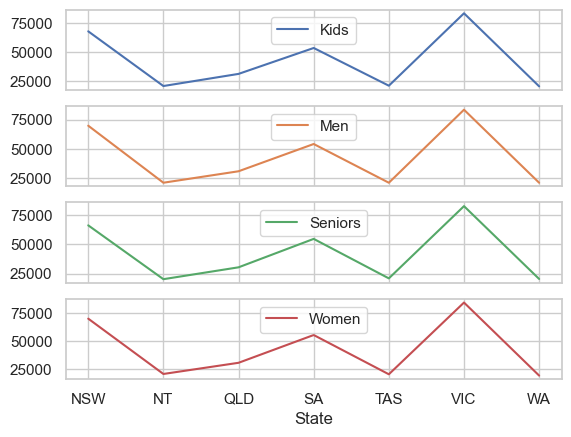

In [230]:

# The following code shows how to group the DataFrame by the 'Group' variable and plot the State wise ‘Sales’ of each Group in individual subplots:
pd.pivot_table(df,
               index='State', columns='Group', values='Sales'
              ).plot(subplots=True)
df.groupby(['State', 'Group']).Sales.mean()

Group    State
Kids     NSW      68047.169811
         NT       21111.111111
         QLD      31518.518519
         SA       53759.259259
         TAS      21388.888889
         VIC      83530.219780
         WA       20833.333333
Men      NSW      69849.624060
         NT       21342.592593
         QLD      31083.333333
         SA       54277.777778
         TAS      21324.074074
         VIC      83440.860215
         WA       21305.555556
Seniors  NSW      66020.992366
         NT       20240.740741
         QLD      30333.333333
         SA       54509.259259
         TAS      20925.925926
         VIC      82365.591398
         WA       20416.666667
Women    NSW      69933.460076
         NT       20935.185185
         QLD      30833.333333
         SA       55444.444444
         TAS      20657.407407
         VIC      84197.368421
         WA       19490.740741
Name: Sales, dtype: float64

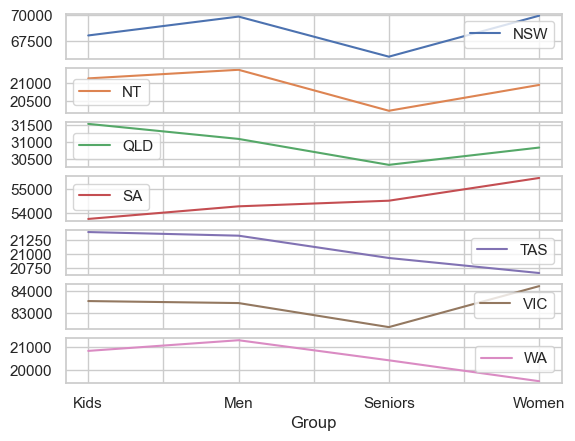

In [231]:
# Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.
#define index column
# df.set_index('State', inplace=True)
#group data by Group and display sales as line chart
# df.groupby('Group')['Sales'].plot(legend=True)


# df.columns
# if 'Index'in df.index.names:
# df.drop(df.columns[[0, 1]], axis=1, inplace=True)
# df.head()
# print(f"Indexes: {df.index.names}")
# if 'Date'in df.index.names:
#     df.reset_index(inplace=True)

pd.pivot_table(df,
               index='Group', columns='State', values='Sales'
              ).plot(subplots=True)
df.groupby(['Group', 'State']).Sales.mean()

In [232]:
sns.set_theme(style="whitegrid")

# penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
# g = sns.catplot(
#     data=df, kind="bar",
#     x="States", y="Sales", hue="Group",
#     errorbar="sd", palette="dark", alpha=.6, height=6
# )
# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

df.head()
df.index.names

FrozenList([None])

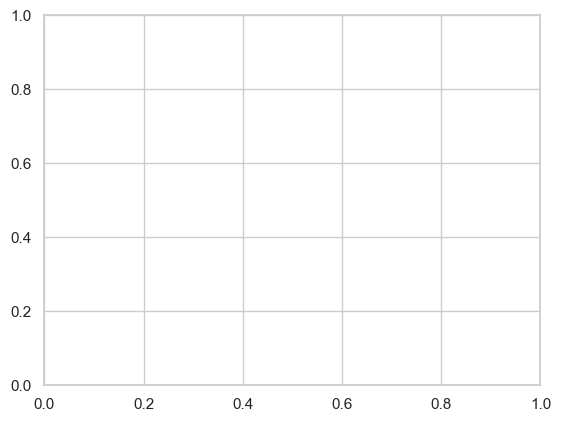

In [233]:
# Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 
fig, ax = plt.subplots()

<Axes: xlabel='State', ylabel='Sales'>

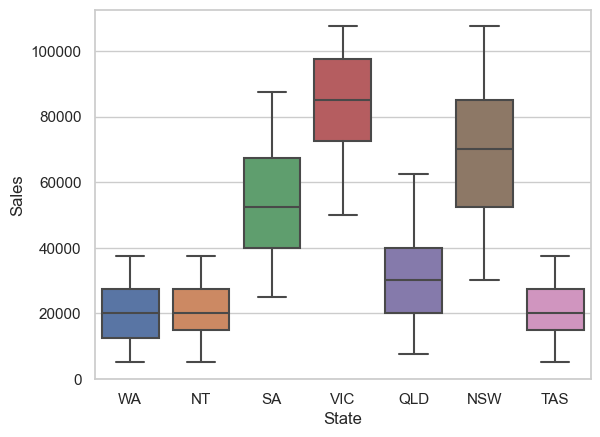

In [234]:
sns.boxplot(x='State', y='Sales', data=df)
